In [1]:
# Importing the libraries.

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [2]:
# Importing Dataset as dataframe.

df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74


In [3]:
# Exploring data.

df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6017.000000,5983.000000,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.582289,601.355233,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 658.5+ KB


In [5]:
# Finding missing values

df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# Dropping rows with null values

df.dropna(inplace=True)

In [7]:
# Finding missing values

df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [8]:
# Exploring parameters

print(df.Fuel_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner_Type.value_counts())

Fuel_Type
Diesel    443
Petrol    371
CNG         9
Name: count, dtype: int64
Transmission
Manual       512
Automatic    311
Name: count, dtype: int64
Owner_Type
First     765
Second     55
Third       3
Name: count, dtype: int64


In [9]:
# Encoding dataframe

# For fuel types.
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)

# For Transmission type
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# For Owner Type
df.replace({'Owner_Type': {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}}, inplace=True)

/tmp/ipykernel_358/133526643.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)
/tmp/ipykernel_358/133526643.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
/tmp/ipykernel_358/133526643.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

In [10]:
# Updated dataset

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,0,0,0,18.20,1199.0,88.7,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,1,1,0,11.36,2755.0,171.5,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,0,0,0,21.56,1462.0,103.25,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,1,0,0,13.50,2477.0,175.56,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,1,1,0,22.69,1995.0,190,5.0,47.87 Lakh,18.55


In [11]:
# Splitting the dataframe into data and target.

X = df.drop(['Price', 'Name', 'New_Price', 'Location'], axis=1)
Y = df['Price']

In [12]:
X.head()

,Unnamed: 0,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2,2,2011,46000,0,0,0,18.20,1199.0,88.7,5.0
7,7,2016,36000,1,1,0,11.36,2755.0,171.5,8.0
10,10,2018,25692,0,0,0,21.56,1462.0,103.25,5.0
15,15,2014,110000,1,0,0,13.50,2477.0,175.56,7.0
20,20,2014,32982,1,1,0,22.69,1995.0,190,5.0


In [13]:
Y.head()

2      4.50
7     17.50
10     9.95
15    15.00
20    18.55
Name: Price, dtype: float64

In [14]:
# Splitting data into training and testing sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [15]:
# Fitting the LinearRegression model

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Implementing Prediction

prediction = model.predict(X_train)

In [17]:
# Calculating model's accuracy

error_score = r2_score(Y_train, prediction)

error_score

0.6863803349632541

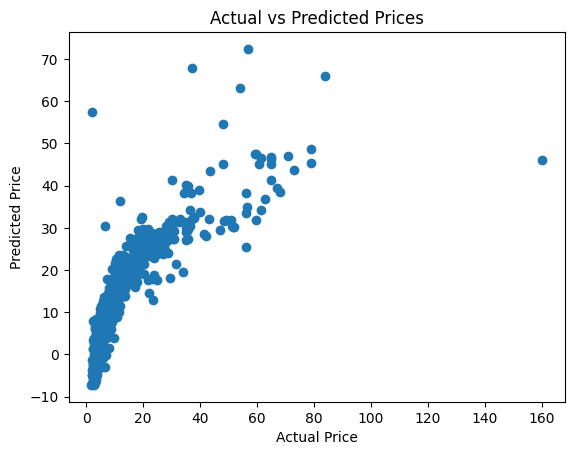

In [18]:
# Representing accuracy visually using scatter plot fro training data

plt.scatter(Y_train, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [19]:
# Predicting for testing dat

test_pred = model.predict(X_test)

In [20]:
# Calculating accuracy for model using testing data

error_score = r2_score(Y_test, test_pred)

error_score

0.6997672112263285

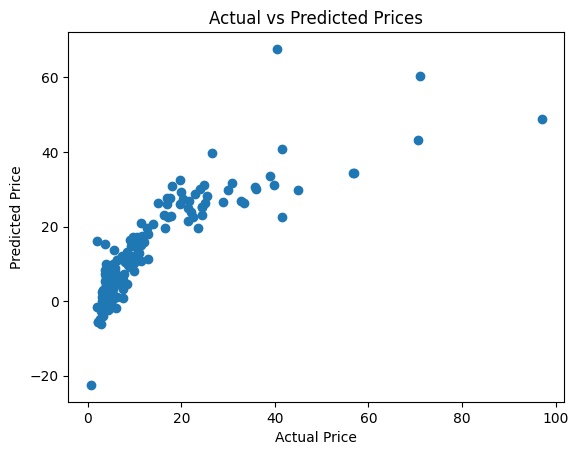

In [21]:
# Representing accuracy visually using scatter plot fro testing data

plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [22]:
# Importing new data

nd = pd.read_csv("new_data.csv")
nd.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Honda City (V) 2015,Shahjahanpur,2015,89000,Diesel,Manual,First,21,1500,117,5,NaN


In [23]:
# Encoding new data

# For fuel types.
nd.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)

# For Transmission type
nd.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# For Owner Type
nd.replace({'Owner_Type': {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}}, inplace=True)

nd

/tmp/ipykernel_358/1013661178.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nd.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)
/tmp/ipykernel_358/1013661178.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nd.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
/tmp/ipykernel_358/1013661178.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Honda City (V) 2015,Shahjahanpur,2015,89000,1,0,0,21,1500,117,5,NaN


In [24]:
# Pre-processing new data

pred_data = nd.drop(['Name', 'Location', 'Price'], axis = 1)
pred_data

,Unnamed: 0,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,2015,89000,1,0,0,21,1500,117,5


In [25]:
# Predicting based on new data

new_prediciton = model.predict(pred_data)
new_prediciton

array([10.82642432])

LASSO REGRESSION MODEL

In [26]:
# Fitting lasso model

lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [27]:
# Predicting via lasso model

lasso_pred = lasso_model.predict(X_train)

In [28]:
# Calculating lasso model's accuracy

error_score = r2_score(Y_train, lasso_pred)

error_score

0.6646931120946568

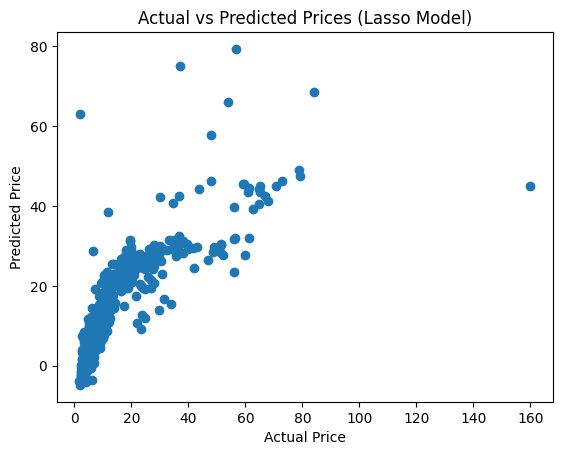

In [29]:
# Representing lasso model's accuracy visually

plt.scatter(Y_train, lasso_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Lasso Model)")
plt.show()